<a href="https://colab.research.google.com/github/skdrums/Mah-jongg/blob/master/mahjong_detection_2025051301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## GPU確認、TPUではpytorchベースのyolov8は動かない
!nvidia-smi

## drive mount
from google.colab import drive
drive.mount('/content/drive')

Wed May 14 07:01:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.7/235.7 GB disk)


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.7/235.7 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.12
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 50.99 GB
Disk                41.7/235.7 GB
CPU                 Intel Xeon 2.30GHz
CPU count           8
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.2.1>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.3>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                ✅ 4.67.

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x4X8SIyJoERoWiYw3LgT")
project = rf.workspace("mahjong-xonkr").project("mahjong-tile-detection-ewk89")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mahjong-tile-detection-3 in yolov8:: 100%|██████████| 3068/3068 [00:00<00:00, 8056.31it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 232MB/s]
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/mahjong-tile-detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

In [8]:
## driveへモデルのアップロード

from google.colab import drive
drive.mount('/content/drive')

import shutil
from datetime import datetime

# Drive保存先
drive_path = '/content/drive/MyDrive/mahjong_detector'
now_str = datetime.now().strftime('%Y%m%d%H%M%S')
file_name = f'yolov8_mahjong_detector_{now_str}'

# モデルフォルダを zip 圧縮（例：my_model -> my_model.zip）
shutil.make_archive(file_name, 'zip', '/content/runs')

# アップロード
shutil.copy(f'{file_name}.zip', f'{drive_path}/{file_name}.zip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/mahjong_detector/yolov8_mahjong_detector_20250514073212.zip'

Saving Screenshot 2025-05-14 at 16.58.01.png to Screenshot 2025-05-14 at 16.58.01 (1).png

image 1/1 /content/Screenshot 2025-05-14 at 16.58.01 (1).png: 288x640 1 1m, 1 2m, 1 3m, 1 3p, 3 4ms, 1 5m, 1 5s, 3 6ss, 2 8ms, 22.7ms
Speed: 1.8ms preprocess, 22.7ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict4


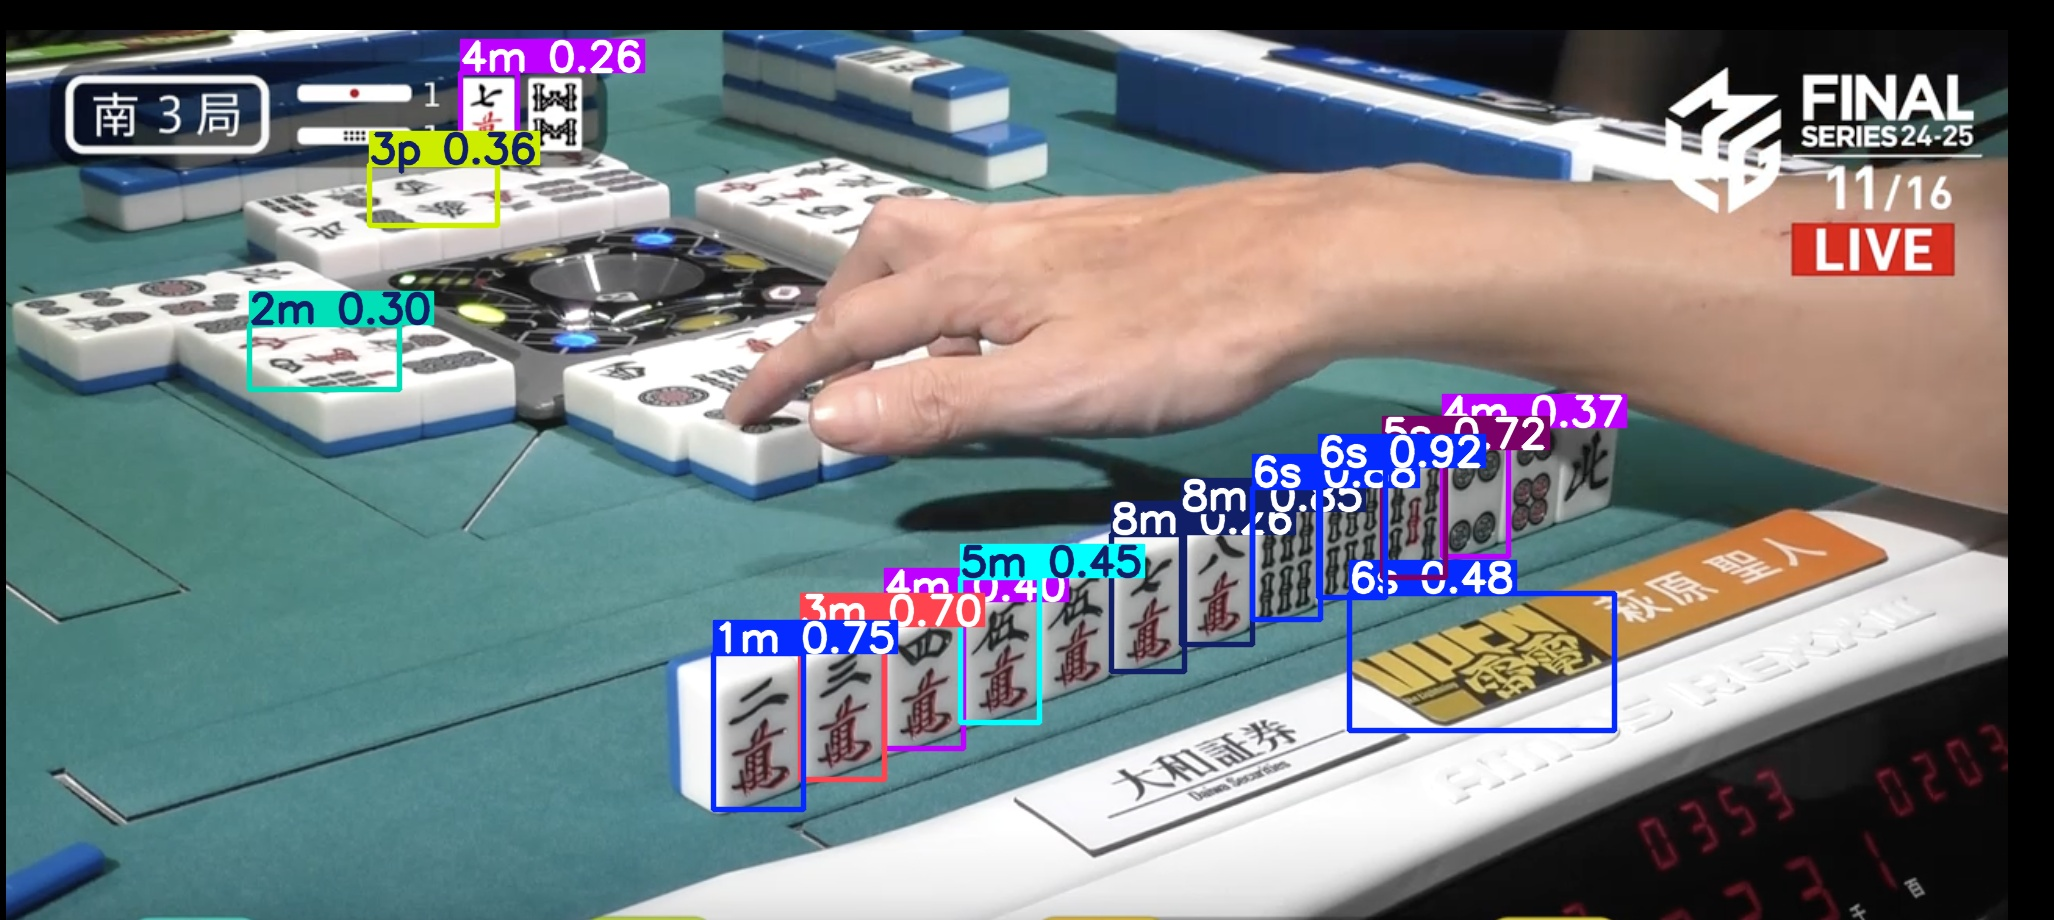

In [21]:
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display
import glob

# モデルを読み込む
model = YOLO("runs/detect/train/weights/best.pt")

# 画像をアップロード
uploaded = files.upload()
uploaded_image_path = next(iter(uploaded))

# 推論
results = opredict(source=uploaded_image_path, save=True, conf=0.25)

# 拡張子を変更する
import os
new_extension = ".jpg"
predicted_image_path = os.path.splitext(uploaded_image_path)[0] + new_extension

# 結果画像を取得して表示
result_image_path = glob.glob("runs/detect/predict*/" + predicted_image_path)[-1]
display(Image(filename=result_image_path))